<a href="https://colab.research.google.com/github/baandaaaaaa/E/blob/main/Copia_de_EstMult04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Crear un DataFrame con los datos
data = {
    'Ventas': [10, 15, 13, 18],
    'TV': [5, 6, 7, 8],
    'Radio': [2, 4, 3, 5]
}

df = pd.DataFrame(data)
print(df)

   Ventas  TV  Radio
0      10   5      2
1      15   6      4
2      13   7      3
3      18   8      5


In [ ]:
# Variables independientes (X) y dependiente (Y)
X = df[['TV', 'Radio']]
Y = df['Ventas']

In [ ]:
import statsmodels.api as sm

# Añadir constante para β0
X = sm.add_constant(X)

In [ ]:
# Ajustar el modelo OLS
modelo = sm.OLS(Y, X).fit()

# Mostrar un resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.347e+29
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.93e-15
Time:                        06:55:42   Log-Likelihood:                 125.58
No. Observations:                   4   AIC:                            -245.2
Df Residuals:                       1   BIC:                            -247.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6667   3.61e-14   1.02e+14      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


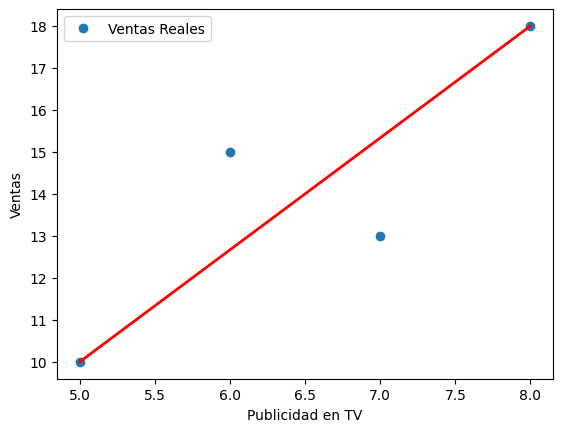

In [ ]:
import matplotlib.pyplot as plt

# Predecir las ventas con el modelo ajustado
df['Predicción'] = modelo.predict(X)

# Gráfica de ventas reales vs predicción
plt.plot(df['TV'], df['Ventas'], 'o', label='Ventas Reales')
#plt.plot(df['TV'], df['Predicción'], 'r-', label='Predicción')
plt.plot([df['TV'].min(), df['TV'].max()], [df['Predicción'].min(), df['Predicción'].max()], color='red', lw=2)
plt.xlabel('Publicidad en TV')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
# Calcular los residuos (error)
df['Residuos'] = df['Ventas'] - df['Predicción']
print(df[['Ventas', 'Predicción', 'Residuos']])

   Ventas  Predicción      Residuos
0      10        10.0  7.105427e-15
1      15        15.0  3.552714e-15
2      13        13.0  7.105427e-15
3      18        18.0  3.552714e-15


In [ ]:
# Calcular el Error Cuadrático Medio (MSE)
mse = (df['Residuos'] ** 2).mean()
print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 3.155443620884047e-29


In [ ]:
import numpy as np

# Calcular la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

Raíz del Error Cuadrático Medio (RMSE): 5.617333549722722e-15


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = np.abs(df['Residuos']).mean()
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 5.329070518200751e-15


**Resumen**

**Residuos:** Diferencia entre los valores reales y los predichos. Nos permiten ver los errores puntuales.

**MSE:** Penaliza más los errores grandes porque los eleva al cuadrado. Sensible a valores atípicos.

**RMSE:** Es la raíz cuadrada del MSE, con las mismas unidades que los datos originales.

**MAE:** Mide el error promedio absoluto, menos sensible a errores grandes en comparación con el MSE.

**R^2** Indica qué tan bien se ajusta el modelo a los datos. Valores cercanos a 1 son deseables.

# **Ejemplo 2**

In [ ]:
# Crear un DataFrame con los datos
data = {
    'Likes': [500, 800, 650, 700, 1200, 1000, 900, 750, 650, 1100],
    'Comments': [45, 80, 60, 55, 130, 110, 100, 70, 65, 115],
    'Shares': [30, 50, 40, 35, 75, 70, 60, 45, 40, 80],
    'Followers': [1500, 2200, 1800, 2000, 3000, 2700, 2500, 2100, 1800, 2900]
}

df = pd.DataFrame(data)
print(df)

   Likes  Comments  Shares  Followers
0    500        45      30       1500
1    800        80      50       2200
2    650        60      40       1800
3    700        55      35       2000
4   1200       130      75       3000
5   1000       110      70       2700
6    900       100      60       2500
7    750        70      45       2100
8    650        65      40       1800
9   1100       115      80       2900


In [ ]:
# Definir las variables dependiente (Y) e independientes (X)
X = df[['Comments', 'Shares', 'Followers']]  # Variables independientes
Y = df['Likes']  # Variable dependiente

In [ ]:
# Añadir constante β0
X = sm.add_constant(X)

In [ ]:
# Ajustar el modelo de regresión lineal múltiple
modelo = sm.OLS(Y, X).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     222.5
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.54e-06
Time:                        06:42:53   Log-Likelihood:                -44.059
No. Observations:                  10   AIC:                             96.12
Df Residuals:                       6   BIC:                             97.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -89.0289     72.306     -1.231      0.2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Predecir los "likes" con los datos actuales
df['Predicción'] = modelo.predict(X)
print(df[['Likes', 'Predicción']])

   Likes   Predicción
0    500   503.387133
1    800   803.949595
2    650   630.067758
3    700   696.515132
4   1200  1167.862799
5   1000  1021.915152
6    900   942.435738
7    750   752.404370
8    650   641.873276
9   1100  1089.589047


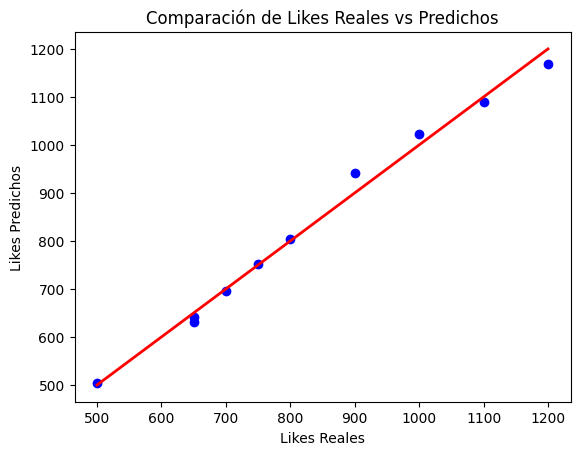

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de los Likes reales vs Predichos
plt.scatter(df['Likes'], df['Predicción'], color='blue')
plt.plot([df['Likes'].min(), df['Likes'].max()], [df['Likes'].min(), df['Likes'].max()], color='red', lw=2)
plt.xlabel('Likes Reales')
plt.ylabel('Likes Predichos')
plt.title('Comparación de Likes Reales vs Predichos')
plt.show()

In [ ]:
# Calcular el Error Cuadrático Medio (MSE)
mse = ((df['Likes'] - df['Predicción']) ** 2).mean()
print(f"MSE: {mse}")

# Calcular la Raíz del Error Cuadrático Medio (RMSE)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

MSE: 393.0588498891296
RMSE: 19.825711838144162
